## Importing Libraries

In [22]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)


## Reading the data

In [21]:
file_path = 'movies.csv'
df = pd.read_csv(file_path)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


## Let's see if there's any missing data

In [32]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [42]:
df = df.fillna(0)

## Basic Data Cleaning

#### Checking the data types

In [24]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

#### Changing the data type of columns

In [43]:
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

#### Making sure the year column is the same as the released column

In [50]:
df['released'] = df['year']
df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,June
1,The Blue Lagoon,R,Adventure,1980,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,July
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,June
3,Airplane!,PG,Comedy,1980,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,July
4,Caddyshack,R,Comedy,1980,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,July


#### Ordering Data by the gross revenue

In [60]:
pd.set_option('display.max_rows', 20)

In [71]:
df = df.sort_values(by=['gross'],inplace=False,ascending=False)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,2009,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,Dece
7445,Avengers: Endgame,PG-13,Action,2019,2019,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,Apri
3045,Titanic,PG-13,Drama,1997,1997,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,Dece
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,2015,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,Dece
7244,Avengers: Infinity War,PG-13,Action,2018,2018,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,Apri


#### Drop any duplicates

In [67]:
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,June
1,The Blue Lagoon,R,Adventure,1980,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,July
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,June
3,Airplane!,PG,Comedy,1980,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,July
4,Caddyshack,R,Comedy,1980,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,0,Drama,2020,2020,3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,0,90.0,Octo
7664,Dream Round,0,Comedy,2020,2020,4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0,Febr
7665,Saving Mbango,0,Drama,2020,2020,5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,0.0,Apri
7666,It's Just Us,0,Drama,2020,2020,0.0,0.0,James Randall,James Randall,Christina Roz,United States,15000,0,0,120.0,Octo


## Predictions: the budget is going to have a high correlation and the company will have a correlation as well

#### Scatter plotting with budget vs gross revenue

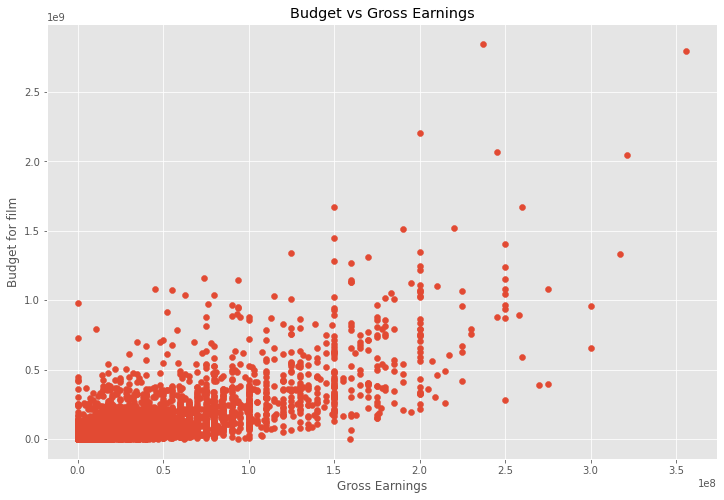

In [74]:
plt.scatter(x = df.budget, y = df.gross)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for film')
plt.show()


#### Regression plotting Budget vs Gross


<AxesSubplot:xlabel='budget', ylabel='gross'>

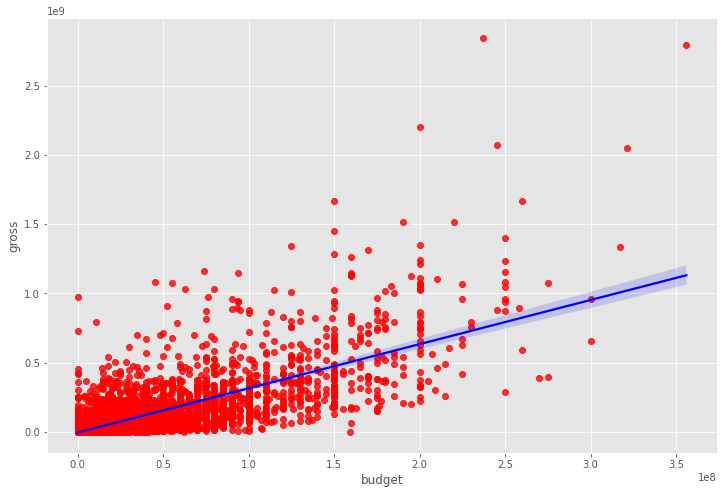

In [78]:
sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws = {"color":"red"}, line_kws = {"color":"blue"})

#### Examine the correlation

In [83]:
df.corr(method = 'pearson')

,year,released,score,votes,budget,gross,runtime
year,1.000000,1.000000,0.092616,0.222427,0.309212,0.261900,0.116358
released,1.000000,1.000000,0.092616,0.222427,0.309212,0.261900,0.116358
score,0.092616,0.092616,1.000000,0.407101,0.056863,0.186012,0.394564
votes,0.222427,0.222427,0.407101,1.000000,0.486931,0.632870,0.306984
budget,0.309212,0.309212,0.056863,0.486931,1.000000,0.750157,0.268372
gross,0.261900,0.261900,0.186012,0.632870,0.750157,1.000000,0.244339
runtime,0.116358,0.116358,0.394564,0.306984,0.268372,0.244339,1.000000


#### There is a high correlation between budget and gross

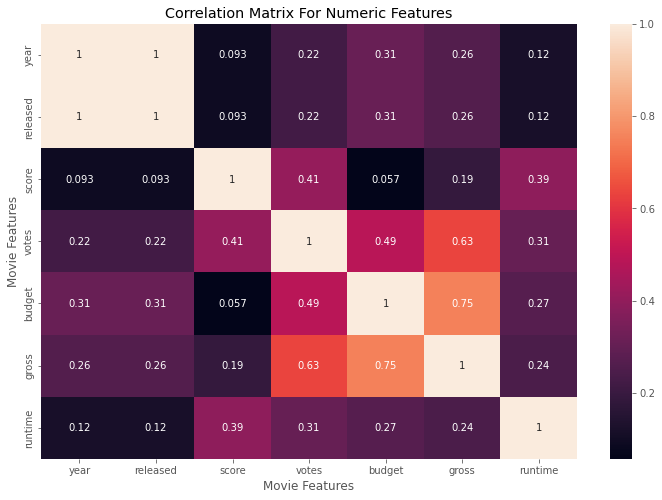

In [86]:
#Visualizing the correlation matrix

correlation_matrix = df.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix For Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

#### Looks at company (not numeric)

In [88]:
# make the company field numeric

df_numerized = df

for col_name in df_numerized.columns:
    if df_numerized[col_name].dtype == 'object':
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,533,6,0,2009,2009,7.8,1100000.0,1155,1779,2335,56,237000000,2847246203,2254,162.0,11
7445,535,6,0,2019,2019,8.4,903000.0,162,744,2242,56,356000000,2797501328,1607,181.0,9
3045,6896,6,6,1997,1997,7.8,1100000.0,1155,1779,1596,56,200000000,2201647264,2254,194.0,11
6663,5144,6,0,2015,2015,7.8,876000.0,1125,2551,525,56,245000000,2069521700,1541,138.0,11
7244,536,6,0,2018,2018,8.4,897000.0,162,744,2242,56,321000000,2048359754,1607,149.0,9


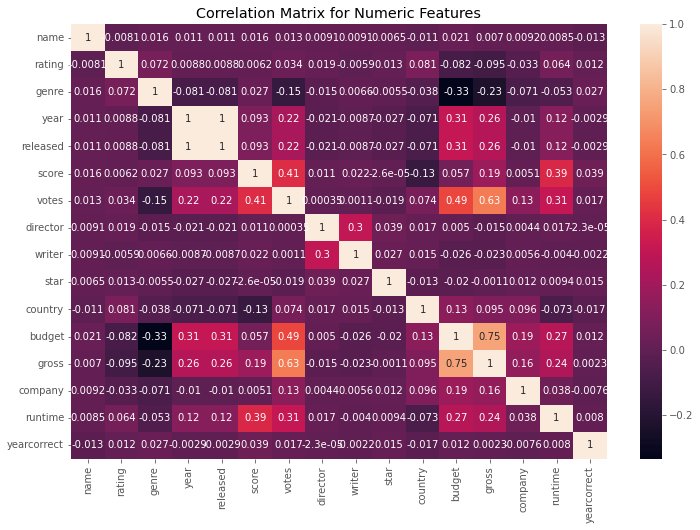

In [90]:
correlation_matrix = df_numerized.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix for Numeric Features')
plt.show()

In [97]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
sorted_pairs = corr_pairs.sort_values()
high_correlations = sorted_pairs[(sorted_pairs > 0.5)]
high_correlations

votes        gross          0.632870
gross        votes          0.632870
             budget         0.750157
budget       gross          0.750157
name         name           1.000000
                              ...   
country      country        1.000000
budget       budget         1.000000
gross        gross          1.000000
votes        votes          1.000000
yearcorrect  yearcorrect    1.000000
Length: 22, dtype: float64

#### Votes and budget have the highest correlation to gross earnings and company has low correlation